## Relationship between the hallmarks of cancer and liver cancer progression

### Load libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
import pickle

### Set variables

In [3]:
data_dir=""
response_name="patient.race"
rnaseq_file=data_dir+"lihc_rnaseq.csv.gz"
clinical_file=data_dir+"lihc_clinical.csv.gz"

### Load data

#### RNASeq

In [4]:
rnaseq = (pd.
          read_csv(rnaseq_file,compression="gzip").
          set_index('bcr_patient_barcode').
          applymap(lambda x : int(np.ceil(x)))
         )
display(rnaseq.shape)
display(rnaseq.head())

(423, 20531)

,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,...,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932
bcr_patient_barcode,,,,,,,,,,,,,,,,,,,,,
TCGA-2V-A95S-01A-11R-A37K-07,0,2,4,91,1018,0,142,1,0,0,...,25,274,795,19,500,3173,891,511,4,7
TCGA-2Y-A9GS-01A-12R-A38B-07,0,27,3,72,640,0,123,2,0,0,...,69,633,1154,72,1001,5302,756,861,7,483
TCGA-2Y-A9GT-01A-11R-A38B-07,0,0,5,96,743,0,96,2,1,0,...,47,1220,1134,13,1290,3220,861,524,15,84
TCGA-2Y-A9GU-01A-11R-A38B-07,0,6,6,62,1187,0,281,1,0,0,...,19,286,1151,10,942,3093,1340,344,3,3
TCGA-2Y-A9GV-01A-11R-A38B-07,0,12,6,105,879,0,283,0,0,0,...,42,1000,1632,5,1381,2903,576,666,3,120


In [5]:
gene_name_logical = [len(x[0])>1 for x in rnaseq.columns.str.split('|')]
sub = rnaseq.loc[:,gene_name_logical]
sub.columns = [x[0] for x in sub.columns.str.split('|')]
rnaseq_sub = sub.copy()
rnaseq_sub.head()

,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
bcr_patient_barcode,,,,,,,,,,,,,,,,,,,,,
TCGA-2V-A95S-01A-11R-A37K-07,22283,584,0,375,0,286320,81,543,1,1032,...,25,274,795,19,500,3173,891,511,4,7
TCGA-2Y-A9GS-01A-12R-A38B-07,22642,1573,3,99,0,31169,163,2,1,903,...,69,633,1154,72,1001,5302,756,861,7,483
TCGA-2Y-A9GT-01A-11R-A38B-07,77670,1281,0,215,1,19515,119,1,3,773,...,47,1220,1134,13,1290,3220,861,524,15,84
TCGA-2Y-A9GU-01A-11R-A38B-07,9323,1253,0,2914,2,243941,72,0,0,722,...,19,286,1151,10,942,3093,1340,344,3,3
TCGA-2Y-A9GV-01A-11R-A38B-07,84243,1641,0,404,0,8756,83,0,9,828,...,42,1000,1632,5,1381,2903,576,666,3,120


In [41]:
rnaseq_sub.index = rnaseq_sub.index.map(lambda x: '-'.join(x.split('-')[:3]).lower())
rnaseq_sub.head()

,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
bcr_patient_barcode,,,,,,,,,,,,,,,,,,,,,
tcga-2v-a95s,22283,584,0,375,0,286320,81,543,1,1032,...,25,274,795,19,500,3173,891,511,4,7
tcga-2y-a9gs,22642,1573,3,99,0,31169,163,2,1,903,...,69,633,1154,72,1001,5302,756,861,7,483
tcga-2y-a9gt,77670,1281,0,215,1,19515,119,1,3,773,...,47,1220,1134,13,1290,3220,861,524,15,84
tcga-2y-a9gu,9323,1253,0,2914,2,243941,72,0,0,722,...,19,286,1151,10,942,3093,1340,344,3,3
tcga-2y-a9gv,84243,1641,0,404,0,8756,83,0,9,828,...,42,1000,1632,5,1381,2903,576,666,3,120


#### Clinical 

In [42]:
clinical = pd.read_csv('clinical.tsv', sep='\t')
clinical['submitter_id'] = clinical['submitter_id'].map(lambda x: x.lower())
clinical.head()

,case_id,submitter_id,project_id,gender,year_of_birth,race,days_to_birth,ethnicity,vital_status,days_to_death,...,treatment_effect,initial_disease_status,treatment_type,therapeutic_agents,regimen_or_line_of_therapy,treatment_intent_type,treatment_anatomic_site,treatment_outcome,days_to_treatment_end,treatment_or_therapy
0,bce25281-502e-4599-9679-32dc8462ffb1,tcga-dd-a4ne,TCGA-LIHC,female,1936,white,-27549,hispanic or latino,Dead,660,...,--,--,"Pharmaceutical Therapy, NOS",--,--,--,--,--,--,no
1,654af137-70d9-4ee4-9f69-793e352d30f8,tcga-dd-a1ee,TCGA-LIHC,male,1933,white,-26858,not hispanic or latino,Dead,349,...,--,--,"Pharmaceutical Therapy, NOS",--,--,--,--,--,--,no
2,45f00f00-d793-4dca-aeb9-7626d4575c90,tcga-gj-a9db,TCGA-LIHC,male,1945,white,-25020,not hispanic or latino,Dead,67,...,--,--,"Pharmaceutical Therapy, NOS",--,--,--,--,--,--,no
3,496beef9-80d9-4734-a23d-334ae1b6aaab,tcga-dd-aac8,TCGA-LIHC,male,1936,asian,-26322,not hispanic or latino,Dead,16,...,--,--,"Pharmaceutical Therapy, NOS",--,--,--,--,--,--,no
4,d1aa9c1a-d732-48c0-b669-8a14e0397344,tcga-2y-a9gv,TCGA-LIHC,female,1953,white,-20011,not hispanic or latino,Dead,2532,...,--,--,"Pharmaceutical Therapy, NOS",--,--,--,--,--,--,yes


#### Join RNASeq and Clinical tumor stage

In [56]:
full_df = pd.merge(rnaseq_sub.reset_index(), clinical[['submitter_id','gender','race','ethnicity']], left_on='bcr_patient_barcode', right_on='submitter_id', how='inner') \
    .set_index('bcr_patient_barcode') \
    .drop('submitter_id', axis=1)
#ensuring ID uniqueness
full_df.index = [x + '-' + str(i) for i,x in enumerate(full_df.index)]
full_df.head()

,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,...,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR,gender,race,ethnicity
tcga-2v-a95s-0,22283,584,0,375,0,286320,81,543,1,1032,...,19,500,3173,891,511,4,7,male,asian,Alive
tcga-2y-a9gs-1,22642,1573,3,99,0,31169,163,2,1,903,...,72,1001,5302,756,861,7,483,male,white,hispanic or latino
tcga-2y-a9gt-2,77670,1281,0,215,1,19515,119,1,3,773,...,13,1290,3220,861,524,15,84,male,white,not hispanic or latino
tcga-2y-a9gu-3,9323,1253,0,2914,2,243941,72,0,0,722,...,10,942,3093,1340,344,3,3,female,white,not hispanic or latino
tcga-2y-a9gv-4,84243,1641,0,404,0,8756,83,0,9,828,...,5,1381,2903,576,666,3,120,female,white,not hispanic or latino


In [57]:
full_df_stage = pd.merge(rnaseq_sub.reset_index(), clinical[['submitter_id','gender','race','ethnicity','tumor_stage']], left_on='bcr_patient_barcode', right_on='submitter_id', how='inner') \
    .set_index('bcr_patient_barcode') \
    .drop('submitter_id', axis=1)
#ensuring ID uniqueness
full_df_stage.index = [x + '-' + str(i) for i,x in enumerate(full_df_stage.index)]
full_df_stage.head()

,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,...,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR,gender,race,ethnicity,tumor_stage
tcga-2v-a95s-0,22283,584,0,375,0,286320,81,543,1,1032,...,500,3173,891,511,4,7,male,asian,Alive,8170/3
tcga-2y-a9gs-1,22642,1573,3,99,0,31169,163,2,1,903,...,1001,5302,756,861,7,483,male,white,hispanic or latino,not reported
tcga-2y-a9gt-2,77670,1281,0,215,1,19515,119,1,3,773,...,1290,3220,861,524,15,84,male,white,not hispanic or latino,stage i
tcga-2y-a9gu-3,9323,1253,0,2914,2,243941,72,0,0,722,...,942,3093,1340,344,3,3,female,white,not hispanic or latino,20187
tcga-2y-a9gv-4,84243,1641,0,404,0,8756,83,0,9,828,...,1381,2903,576,666,3,120,female,white,not hispanic or latino,stage i


In [58]:
# Subset out the recognizable stages
tumor_stages = clinical['tumor_stage'].value_counts()
tumor_stages[tumor_stages.index.str.startswith('stage')]

stage i       43
stage iiia    34
stage ii      25
stage iiic     5
stage iiib     4
stage ivb      2
stage iii      2
stage iv       1
Name: tumor_stage, dtype: int64

In [62]:
# Subset full dataframe for patient samples that have a corresponding tumor stage
full_df_stage = full_df_stage.loc[full_df_stage['tumor_stage'].str.startswith('stage')]

# Since there are substages (eg, stage iia and stage iib), we will conver them to the 4 main stages
full_df_stage['tumor_stage'] = full_df_stage['tumor_stage'] \
                            .str.replace('a', '') \
                            .str.replace('b', '') \
                            .str.replace('c', '') \
                            .str.replace('v', '') \
                            .str.replace('stge','stage')
full_df_stage

,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,...,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR,gender,race,ethnicity,tumor_stage
tcga-2y-a9gt-2,77670,1281,0,215,1,19515,119,1,3,773,...,1290,3220,861,524,15,84,male,white,not hispanic or latino,stage i
tcga-2y-a9gv-4,84243,1641,0,404,0,8756,83,0,9,828,...,1381,2903,576,666,3,120,female,white,not hispanic or latino,stage i
tcga-2y-a9gw-5,73056,1423,0,270,0,43813,299,0,1,622,...,748,8467,993,457,7,103,male,white,not hispanic or latino,stage i
tcga-2y-a9gy-7,23352,1559,0,104,2,11699,42,2,3,1179,...,486,3825,458,471,14,1,female,white,not hispanic or latino,stage ii
tcga-2y-a9gz-8,43942,2033,1,963,0,264407,97,1,0,919,...,1550,1394,712,976,5,271,female,white,not hispanic or latino,stage ii
tcga-2y-a9h1-10,149750,1014,0,469,0,244995,100,0,4,744,...,445,2757,465,369,0,164,male,white,not hispanic or latino,stage i
tcga-2y-a9h5-14,33561,1751,0,287,0,71991,126,17,0,791,...,668,3803,831,379,2,40,female,white,not hispanic or latino,stage i
tcga-2y-a9ha-19,17912,2493,0,164,1,47965,373,0,1,1110,...,1656,2314,653,559,4,109,male,white,not hispanic or latino,stage ii
tcga-4r-aa8i-22,49395,2003,0,263,7,88758,131,2,19,1094,...,1492,3234,578,725,6,123,male,white,not hispanic or latino,stage ii
tcga-5r-aaam-28,77820,2061,0,309,0,85226,103,0,1,686,...,1198,3411,523,541,16,192,female,white,not hispanic or latino,stage ii


In [63]:
# One hot encoding on full dataframe to convert categorical fields into binary fields
full_df_onehot = pd.get_dummies(full_df, drop_first=False)
full_df_onehot.head()

,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,...,race_american indian or alaska native,race_asian,race_black or african american,race_not reported,race_white,ethnicity_Alive,ethnicity_Dead,ethnicity_hispanic or latino,ethnicity_not hispanic or latino,ethnicity_not reported
tcga-2v-a95s-0,22283,584,0,375,0,286320,81,543,1,1032,...,0,1,0,0,0,1,0,0,0,0
tcga-2y-a9gs-1,22642,1573,3,99,0,31169,163,2,1,903,...,0,0,0,0,1,0,0,1,0,0
tcga-2y-a9gt-2,77670,1281,0,215,1,19515,119,1,3,773,...,0,0,0,0,1,0,0,0,1,0
tcga-2y-a9gu-3,9323,1253,0,2914,2,243941,72,0,0,722,...,0,0,0,0,1,0,0,0,1,0
tcga-2y-a9gv-4,84243,1641,0,404,0,8756,83,0,9,828,...,0,0,0,0,1,0,0,0,1,0


In [47]:
# Filtering columns that are not required after one hot encoding 
full_df_onehot_filter = full_df_onehot.drop(['race_not reported','ethnicity_not reported','gender_male'],axis=1)
full_df_onehot_filter.head()

,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,...,tAKR,gender_female,race_american indian or alaska native,race_asian,race_black or african american,race_white,ethnicity_Alive,ethnicity_Dead,ethnicity_hispanic or latino,ethnicity_not hispanic or latino
tcga-2v-a95s-0,22283,584,0,375,0,286320,81,543,1,1032,...,7,0,0,1,0,0,1,0,0,0
tcga-2y-a9gs-1,22642,1573,3,99,0,31169,163,2,1,903,...,483,0,0,0,0,1,0,0,1,0
tcga-2y-a9gt-2,77670,1281,0,215,1,19515,119,1,3,773,...,84,0,0,0,0,1,0,0,0,1
tcga-2y-a9gu-3,9323,1253,0,2914,2,243941,72,0,0,722,...,3,1,0,0,0,1,0,0,0,1
tcga-2y-a9gv-4,84243,1641,0,404,0,8756,83,0,9,828,...,120,1,0,0,0,1,0,0,0,1


In [48]:
x = full_df_onehot_filter #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
genome_clinic_df = pd.DataFrame(x_scaled,columns=full_df_onehot_filter.loc[:, full_df_onehot_filter.columns != 'index'].columns)

C:\AnacondaPython\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [49]:
index_df = full_df_onehot_filter.reset_index()
genome_clinic_std_concat = pd.concat([index_df['index'],genome_clinic_df],axis=1)
genome_clinic_std_concat.head()

,index,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,...,tAKR,gender_female,race_american indian or alaska native,race_asian,race_black or african american,race_white,ethnicity_Alive,ethnicity_Dead,ethnicity_hispanic or latino,ethnicity_not hispanic or latino
0,tcga-2v-a95s-0,0.041064,0.126626,0.000000,0.126290,0.000000,0.448328,0.036836,0.684741,0.004082,...,0.010086,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,tcga-2y-a9gs-1,0.041726,0.341067,0.012552,0.031315,0.000000,0.046382,0.081257,0.002522,0.004082,...,0.695965,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,tcga-2y-a9gt-2,0.143256,0.277754,0.000000,0.071232,0.043478,0.028023,0.057421,0.001261,0.012245,...,0.121037,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,tcga-2y-a9gu-3,0.017152,0.271683,0.000000,1.000000,0.086957,0.381567,0.031961,0.000000,0.000000,...,0.004323,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,tcga-2y-a9gv-4,0.155383,0.355811,0.000000,0.136270,0.000000,0.011075,0.037920,0.000000,0.036735,...,0.172911,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [50]:
genome_clinic_std_concat.set_index('index', inplace=True)
genome_clinic_std_concat.head()

,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,...,tAKR,gender_female,race_american indian or alaska native,race_asian,race_black or african american,race_white,ethnicity_Alive,ethnicity_Dead,ethnicity_hispanic or latino,ethnicity_not hispanic or latino
index,,,,,,,,,,,,,,,,,,,,,
tcga-2v-a95s-0,0.041064,0.126626,0.000000,0.126290,0.000000,0.448328,0.036836,0.684741,0.004082,0.303828,...,0.010086,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
tcga-2y-a9gs-1,0.041726,0.341067,0.012552,0.031315,0.000000,0.046382,0.081257,0.002522,0.004082,0.242105,...,0.695965,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
tcga-2y-a9gt-2,0.143256,0.277754,0.000000,0.071232,0.043478,0.028023,0.057421,0.001261,0.012245,0.179904,...,0.121037,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
tcga-2y-a9gu-3,0.017152,0.271683,0.000000,1.000000,0.086957,0.381567,0.031961,0.000000,0.000000,0.155502,...,0.004323,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
tcga-2y-a9gv-4,0.155383,0.355811,0.000000,0.136270,0.000000,0.011075,0.037920,0.000000,0.036735,0.206220,...,0.172911,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [64]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(genome_clinic_std_concat)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
principalDfConcat = pd.concat([index_df['index'],principalDf],axis=1)

In [54]:
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

kmeans = KMeans(n_clusters=3, random_state=0).fit(principalDfConcat.set_index('index'))
labels = kmeans.labels_

#Glue back to original data
principalDfConcat['clusters'] = labels

principalDfConcat.head()

,index,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,clusters
0,tcga-2v-a95s-0,5.835006,1.285510,3.625356,-1.688013,0.669819,0.067753,-3.543085,1.106201,4.445313,0.007445,0
1,tcga-2y-a9gs-1,-0.269624,4.201841,-2.309895,-2.690299,2.034475,-3.219413,-1.533380,-0.150977,-0.852969,-0.866496,0
2,tcga-2y-a9gt-2,-6.304603,0.220168,1.417678,1.534109,1.054219,-3.371673,0.684955,3.102454,2.259501,-1.377486,1
3,tcga-2y-a9gu-3,-3.034888,1.108492,-2.028318,5.509455,-2.975351,-2.268519,-1.395911,-0.298715,-2.957408,2.251311,1
4,tcga-2y-a9gv-4,-6.618624,1.085372,0.247482,1.390344,0.348872,-2.733287,-0.042785,1.622214,1.627769,-1.907751,1


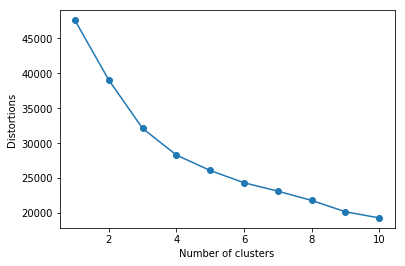

In [65]:
import matplotlib.pyplot as plt

distortions = []
for k in range(1,11):
    kmeans = KMeans(
        n_clusters=k, init = "random",
        n_init=10, max_iter=300, random_state=0
    )
    kmeans.fit(principalDfConcat.set_index('index'))
    distortions.append(kmeans.inertia_)
    
#plot
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Distortions")
plt.show()

## Load the hallmarks of cancer annotations

In [12]:
import pickle

descr_dict = pickle.load(open('../../hallmarks_of_cancer_description_dictionary.pkl','rb'))
geneset_dict = pickle.load(open('../../hallmarks_of_cancer_geneset_dictionary.pkl','rb'))

## X and y

In [13]:
X = full_df.drop('tumor_stage',axis=1)
display(X.shape)
display(X.head())
y = full_df['tumor_stage']
display(y.shape)
display(y.head())
display(y.value_counts())

(139, 20501)

,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
tcga-2y-a9gt-2,77670,1281,0,215,1,19515,119,1,3,773,...,47,1220,1134,13,1290,3220,861,524,15,84
tcga-2y-a9gv-4,84243,1641,0,404,0,8756,83,0,9,828,...,42,1000,1632,5,1381,2903,576,666,3,120
tcga-2y-a9gw-5,73056,1423,0,270,0,43813,299,0,1,622,...,20,1647,707,30,748,8467,993,457,7,103
tcga-2y-a9gy-7,23352,1559,0,104,2,11699,42,2,3,1179,...,17,166,996,129,486,3825,458,471,14,1
tcga-2y-a9gz-8,43942,2033,1,963,0,264407,97,1,0,919,...,49,444,1318,128,1550,1394,712,976,5,271


(139,)

tcga-2y-a9gt-2     i
tcga-2y-a9gv-4     i
tcga-2y-a9gw-5     i
tcga-2y-a9gy-7    ii
tcga-2y-a9gz-8    ii
Name: tumor_stage, dtype: object

i      54
iii    53
ii     32
Name: tumor_stage, dtype: int64

## X Feature Engineering

In [14]:
gs_dfs = []
for gs,set_ in geneset_dict.items():
    gs_df = pd.DataFrame(X.loc[:,set_].std(1))
    gs_df.columns = [gs]
    gs_dfs.append(gs_df)
X_fe = pd.concat(gs_dfs,1)
X_fe.head()

C:\AnacondaPython\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,HALLMARK_ADIPOGENESIS,HALLMARK_ALLOGRAFT_REJECTION,HALLMARK_ANDROGEN_RESPONSE,HALLMARK_ANGIOGENESIS,HALLMARK_APICAL_JUNCTION,HALLMARK_APICAL_SURFACE,HALLMARK_APOPTOSIS,HALLMARK_BILE_ACID_METABOLISM,HALLMARK_CHOLESTEROL_HOMEOSTASIS,HALLMARK_COAGULATION,...,HALLMARK_PROTEIN_SECRETION,HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY,HALLMARK_SPERMATOGENESIS,HALLMARK_TGF_BETA_SIGNALING,HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_UNFOLDED_PROTEIN_RESPONSE,HALLMARK_UV_RESPONSE_DN,HALLMARK_UV_RESPONSE_UP,HALLMARK_WNT_BETA_CATENIN_SIGNALING,HALLMARK_XENOBIOTIC_METABOLISM
tcga-2y-a9gt-2,59644.714679,20328.294564,23425.239059,47314.342902,5986.829113,2476.732985,16926.134574,26106.104684,24065.057892,107141.388803,...,3487.974653,16793.659132,4121.451073,3994.318354,5059.029797,8219.092332,5120.565685,8193.653800,1588.157841,37744.498034
tcga-2y-a9gv-4,54798.654488,11013.987675,10450.210287,36372.345489,4067.949359,3043.309331,13501.109280,27160.200359,19069.604428,88275.726833,...,2995.396715,25506.728791,3032.467312,3903.673227,4323.088264,10278.107744,1774.643495,7736.825851,1046.335806,40181.464356
tcga-2y-a9gw-5,47242.144793,10659.188754,12191.750685,41813.537891,9406.913160,4777.895965,14891.634222,11825.712189,18534.390950,118611.841372,...,3916.577684,114833.579664,2472.251034,2717.541611,6815.115784,8530.569988,3215.023390,10018.626937,951.771890,27973.385345
tcga-2y-a9gy-7,14492.691522,8049.821376,7357.992553,13184.301183,8044.544575,1962.136731,7781.710114,7751.487326,11504.826063,32202.282235,...,4012.192629,69559.662887,1701.187878,2084.033907,3178.856311,7412.896240,1419.053873,5455.628246,1097.061690,15360.003825
tcga-2y-a9gz-8,40887.912687,7821.448847,9815.592247,61869.963777,3474.128339,2505.767634,12756.163096,31345.900199,16833.646407,87661.806033,...,3265.633115,16177.321426,3127.661485,3047.265238,2611.565048,8770.213105,2460.331724,9472.776739,1060.182058,29066.823053


## Vanilla Multinomial Logit

In [15]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold
import sklearn.metrics as m
import numpy as np

In [24]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=250, tol=0.0001, \
precompute_distances='auto', copy_x=True, n_jobs=None, algorithm='auto')

from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

#Make a copy of DF
cluster_df = clusterdist_subset3[['SendingFacility','Age','DifferentCityFlag','PatientMaritalStatusMapped','PatientEthnicGroupMapped','HaversineDistance']]

#Transform all the categorical variables to dummies
cluster_df = pd.get_dummies(cluster_df, columns=['SendingFacility','PatientMaritalStatusMapped','PatientEthnicGroupMapped'])
cluster_df.head(10)

#Standardize
clmns = ['Age', 
'DifferentCityFlag', 
'HaversineDistance', 
'SendingFacility_Csma', 
'SendingFacility_Csny', 
'SendingFacility_Fluobg', 
'SendingFacility_Hpdc', 
'SendingFacility_Isamp', 
'SendingFacility_Islmed', 
'SendingFacility_Mburke', 
'SendingFacility_Mhmed', 
'SendingFacility_Pcli', 
'PatientMaritalStatusMapped_Annulled', 
'PatientMaritalStatusMapped_Divorced', 
'PatientMaritalStatusMapped_Legally Separated', 
'PatientMaritalStatusMapped_Married', 
'PatientMaritalStatusMapped_Not Specified', 
'PatientMaritalStatusMapped_Other', 
'PatientMaritalStatusMapped_Single', 
'PatientMaritalStatusMapped_Unmarried', 
'PatientMaritalStatusMapped_Widowed', 
'PatientEthnicGroupMapped_Hispanic', 
'PatientEthnicGroupMapped_Non hispanic', 
'PatientEthnicGroupMapped_Unregistered']

cluster_df_std = stats.zscore(cluster_df[clmns])

#Cluster the data

kmeans = KMeans(n_clusters=3, random_state=0).fit(cluster_df_std)
labels = kmeans.labels_

#Glue back to originaal data
cluster_df['clusters'] = labels


#Add the column into our list
clmns.extend(['clusters'])

#Lets analyze the clusters
#print(cluster_df[clmns].groupby(['clusters']).mean())


import matplotlib.pyplot as plt

distortions = []
for k in range(1,11):
    kmeans = KMeans(
        n_clusters=k, init = "random",
        n_init=10, max_iter=300, random_state=0
    )
    kmeans.fit(cluster_df_std)
    distortions.append(kmeans.inertia_)
    
#plot
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Distortions")
plt.show()

In [19]:
mod = LogisticRegression(
    solver='lbfgs',
    multi_class='multinomial',
    max_iter=1e5
)

test_size=0.15
seed = 1
cv_split = 10
y_map = y.map({'i' : 0,'ii' : 1, 'iii' : 2})
X_fe = X_fe.loc[y_map.index]
X_train, X_test, y_train, y_test = train_test_split(X_fe,y_map,
                                                    test_size=test_size,
                                                    random_state=seed,
                                                    shuffle=True)
cv = StratifiedKFold(n_splits=cv_split,random_state=seed,shuffle=True)
fits = []
llosses = []
for train_index, test_index in cv.split(X_train,y_train):
    fit = mod.fit(X_train.iloc[train_index],y_train.iloc[train_index])
    y_proba = fit.predict_proba(X_train.iloc[test_index])
    fits.append(fit)
    lloss = m.log_loss(y_train.iloc[test_index].values,y_proba,labels=fit.classes_)
    llosses.append(lloss)
best_fit = fits[np.argmin(llosses)].fit(X_train,y_train)

coef_de = (pd.DataFrame(
    best_fit.coef_,
    index=best_fit.classes_,
    columns=X_test.columns).
           rename_axis(y.name).
           reset_index().
           melt(
               id_vars=['tumor_stage'],
               var_name='Feature',
               value_name='Coefficient')
          )
coef_de['MCCV'] = seed
coef_de[y.name] = coef_de[y.name].map({0 : 'i',1 : 'ii',2 : 'iii'})

y_proba = best_fit.predict_proba(X_test)
y_pred = best_fit.predict(X_test)
mcm = m.multilabel_confusion_matrix(
    y_test.values.reshape(-1,1),
    y_pred,labels=[0,1,2]
)

/Users/mattheweng/Desktop/Galvanize/Projects/hacknights/env-tcga/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [20]:
tn = mcm[:, 0, 0]
tp = mcm[:, 1, 1]
fn = mcm[:, 1, 0]
fp = mcm[:, 0, 1]
sensitivity = tp / (tp + fn)
print(sensitivity)
specificity = tn / (fp + tn)
print(specificity)

[0.11111111 0.25       0.        ]
[0.25       0.58823529 0.76923077]


In [21]:
coef_de.head()

,tumor_stage,Feature,Coefficient,MCCV
0,i,HALLMARK_ADIPOGENESIS,-0.009266,1
1,ii,HALLMARK_ADIPOGENESIS,0.004689,1
2,iii,HALLMARK_ADIPOGENESIS,0.004577,1
3,i,HALLMARK_ALLOGRAFT_REJECTION,0.044297,1
4,ii,HALLMARK_ALLOGRAFT_REJECTION,-0.034808,1


## Monte Carlo Cross Validation Prediction Functions

[Monte Carlo Cross Validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)) (MCCV), also known as repeated random sub-sampling validation. MCCV creates multiple random splits of the dataset into training and validation data. For each such split, the model is fit to the training data, and predictive accuracy is assessed using the validation data.  The advantage of MCCV over traditional K-fold cross validation is that the proportion of the training/validation split is not dependent on the number of iterations (folds). The disadvantage of this method is that some observations may never be selected in the validation subsample, whereas others may be selected more than once. In other words, validation subsets may overlap. This method also exhibits Monte Carlo variation, meaning that the results will vary if the analysis is repeated with different random splits.

In [22]:
from sklearn.model_selection import cross_validate, train_test_split, StratifiedKFold
import sklearn.metrics as m
from sklearn.base import clone

def mccv(X,Y,models,metrics=['roc_auc'],cv_split=10,seed=42,test_size=0.15,return_train_score=True,n_jobs=1,retrained_models=False,patient_level_predictions=False,return_estimator=True):

    
    y_map = Y.map({'i' : 0,'ii' : 1, 'iii' : 2})
    X = X.loc[y_map.index]
    X_train, X_test, y_train, y_test = train_test_split(X,y_map,
                                                        test_size=test_size,
                                                        random_state=seed,
                                                        shuffle=True)
    cv = StratifiedKFold(n_splits=cv_split,random_state=seed,shuffle=True)
    fits = []
    llosses = []
    for train_index, test_index in cv.split(X_train,y_train):
        fit = mod.fit(X_train.iloc[train_index],y_train.iloc[train_index])
        y_proba = fit.predict_proba(X_train.iloc[test_index])
        fits.append(fit)
        lloss = m.log_loss(y_train.iloc[test_index].values,y_proba,labels=fit.classes_)
        llosses.append(lloss)
    best_fit = fits[np.argmin(llosses)].fit(X_train,y_train)

    coef_de = (pd.DataFrame(
        best_fit.coef_,
        index=best_fit.classes_,
        columns=X_test.columns).
               rename_axis(y_test.name).
               reset_index().
               melt(
                   id_vars=['tumor_stage'],
                   var_name='Feature',
                   value_name='Coefficient')
              )
    coef_de['MCCV'] = seed
    coef_de[y_test.name] = coef_de[y_test.name].map({0 : 'i',1 : 'ii',2 : 'iii'})

    y_proba = best_fit.predict_proba(X_test)
    y_pred = best_fit.predict(X_test)
    mcm = m.multilabel_confusion_matrix(
        y_test.values.reshape(-1,1),
        y_pred,labels=[0,1,2]
    )
    return mcm, coef_de

In [23]:
from joblib import Parallel, delayed

def bootstrap_of_fcn(func=None,params={},n_jobs=4,nboot=2):
    if func==None:
        return "Need fcn to bootstrap"
    parallel = Parallel(n_jobs=n_jobs)
    return parallel(
        delayed(func)(
            seed=k,**params)
        for k in range(nboot))


## Prediction

In [24]:
classification_metrics = ['roc_auc']
cv_split=2
test_size=0.15
seed=42
n_jobs=4
nboot=1000

mod = LogisticRegression(
    solver='lbfgs',
    multi_class='multinomial',
    max_iter=1e5,
    random_state=seed
)

params = {'X' : X_fe, 'Y' : y, 
          'models' : {'Logit' : mod},'cv_split' : cv_split,
          'metrics' : classification_metrics, 
          'n_jobs' : 1,'test_size' : test_size,
          'retrained_models' : True, 
          'patient_level_predictions' : True}

**NOTE:** The below code will take several minutes to execute:

In [25]:
nboot=nboot
lst = bootstrap_of_fcn(func=mccv,
                       params=params,
                       n_jobs=n_jobs,
                       nboot=nboot)

In [26]:
mcms = [lst[i][0] for i in range(len(lst))]
coef_dfs = [lst[i][1] for i in range(len(lst))]

In [ ]:
def contigency_statistics(mcm):
    tn = mcm[:, 0, 0]
    tp = mcm[:, 1, 1]
    fn = mcm[:, 1, 0]
    fp = mcm[:, 0, 1]
    return [tp,fp,fn,tn]

dfs = []
for i,mcm in enumerate(mcms):
    df = (pd.DataFrame(
        contigency_statistics(mcm),
        index=['TP','FP','FN','TN'],
        columns=params['Y'].unique()).
          rename_axis('Statistic').
          reset_index().
          melt(id_vars=['Statistic'],var_name=params['Y'].name)
         )
    df['MCCV'] = i
    dfs.append(df.head())
mcm_df= pd.concat(dfs)
mcm_df.head()

,Statistic,tumor_stage,value,MCCV
0,TP,i,2,0
1,FP,i,5,0
2,FN,i,6,0
3,TN,i,8,0
4,TP,ii,1,0


In [ ]:
feature_importances_df = pd.concat(coef_dfs)
feature_importances_df.head()

,tumor_stage,Feature,Coefficient,MCCV
0,i,HALLMARK_ADIPOGENESIS,-0.000584,0
1,ii,HALLMARK_ADIPOGENESIS,0.000273,0
2,iii,HALLMARK_ADIPOGENESIS,0.000312,0
3,i,HALLMARK_ALLOGRAFT_REJECTION,0.000214,0
4,ii,HALLMARK_ALLOGRAFT_REJECTION,-0.001342,0


In [ ]:
mcm_df.to_csv('performance_statistics.csv')
feature_importances_df.to_csv('feature_importances.csv')

## Data visualization

The goal of this section is to visualize the feature importances that we found above in order to better understand the how features vary and across tumor stage.

We'll use a Sankey diagram to do this. A Sankey is a flow diagram, in which the width of arrows is proportional to the flow quantity. The open-sourced Plotly library has a [Sankey object](https://plot.ly/python/sankey-diagram/) that we will use to accomplish this. You can use the sampled code below to get started.

In [3]:
import plotly.graph_objects as go

In [81]:
feat_importances = pd.read_csv('feature_importances.csv')
mcm_df = pd.read_csv('performance_statistics.csv')

In [5]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["A1", "A2", "B1", "B2", "C1", "C2"],
      color = "blue"
    ),
    link = dict(
      source = [0, 1, 0, 2, 3, 3], # indices correspond to labels, eg A1, A2, A2, B1, ...
      target = [2, 3, 3, 4, 4, 5],
      value = [8, 4, 2, 8, 4, 2]
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [83]:
feat_importances['Coefficient'] = feat_importances['Coefficient'].apply(lambda x: abs(x))

In [65]:
labels = []
for hallmark in ['HALLMARK_ADIPOGENESIS', 'HALLMARK_ALLOGRAFT_REJECTION', 'HALLMARK_ANDROGEN_RESPONSE']:
    for stage in ['i', 'ii','iii']:
        stage_label = '{} {}'.format(hallmark, stage)
        labels.append(stage_label)
labels

['HALLMARK_ADIPOGENESIS i',
 'HALLMARK_ADIPOGENESIS ii',
 'HALLMARK_ADIPOGENESIS iii',
 'HALLMARK_ALLOGRAFT_REJECTION i',
 'HALLMARK_ALLOGRAFT_REJECTION ii',
 'HALLMARK_ALLOGRAFT_REJECTION iii',
 'HALLMARK_ANDROGEN_RESPONSE i',
 'HALLMARK_ANDROGEN_RESPONSE ii',
 'HALLMARK_ANDROGEN_RESPONSE iii']

In [84]:

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = labels,
      color = "blue"
    ),
    link = dict(
      source = list(range(0, len(labels), 3)) + list(range(1, len(labels), 3)), # indices correspond to labels, eg A1, A2, A2, B1, ...
      target = list(range(1, len(labels), 3)) + list(range(2, len(labels), 3)),
      value = feat_importances['Coefficient'].values[:9]
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()